<a href="https://colab.research.google.com/github/hojin99/aitest/blob/main/%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99%EA%B3%BC_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비

In [ ]:
!cd aitest
!ls -al


total 8
drwx------ 3 root root 4096 Nov 11 03:10 aitest
drwx------ 2 root root 4096 Nov 11 03:09 .ipynb_checkpoints


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# pandas를 통해서 원격 csv파일을 datafame으로 저장
df = pd.read_csv('https://bit.ly/perch_csv_data')
print(df.head())

perch_full  = df.to_numpy()
# print(perch_full)

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

# 훈련, 테스트 세트 분리
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)



   length   height   width
0     8.4     2.11    1.41
1    13.7     3.53    2.00
2    15.0     3.82    2.43
3    16.2     4.59    2.63
4    17.4     4.59    2.94


# 다항 회귀 훈련 및 과대 적합

In [ ]:
from sklearn.linear_model import LinearRegression


# 다항식 형태로 특성 추가해서 곡선 형태의 함수 생성
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

poly.get_feature_names()

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# deggree를 많이 줄 경우 과대 적합
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))


(42, 9)
0.9903183436982124
0.9714559911594132
0.9999999999991096
-144.40579242335605


# 규제

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt 

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))



0.9896101671037343
0.9790693977615398


# 규제 최적화

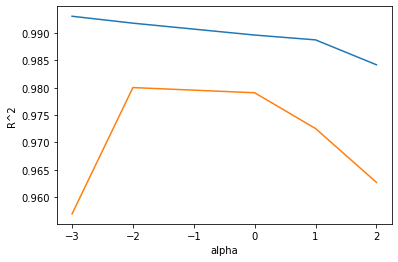

In [ ]:
# 최적의 알파값 확인 (알파값이 높을 수록 규제 강도가 강함)
train_score = []
test_score= []

alpha_list = [0.001, 0.01, 1, 10, 100]

for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()